1

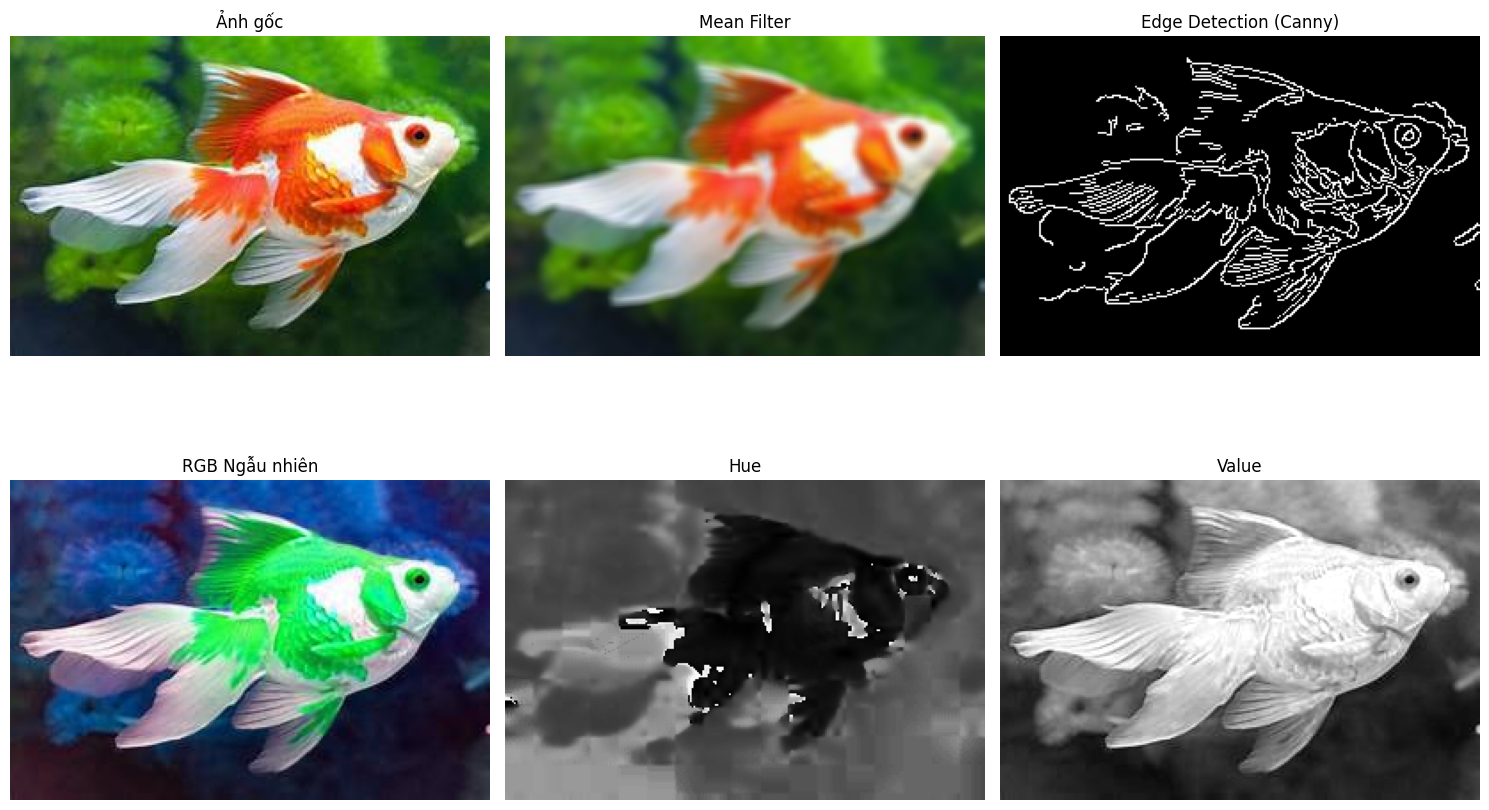

In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

img = cv2.imread('a.jpg')

# 1. Mean filter (lọc trung bình)
mean_filtered = cv2.blur(img, (5, 5))
cv2.imwrite('a_mean.jpg', mean_filtered)

#  2. Biên ảnh dùng Canny
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
cv2.imwrite('a_edges.jpg', edges)

# 3. Đổi màu RGB ngẫu nhiên
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
channels = [0, 1, 2]
random.shuffle(channels)
img_random_color = img_rgb[:, :, channels]
cv2.imwrite('a_random_color.jpg', cv2.cvtColor(img_random_color, cv2.COLOR_RGB2BGR))

# 4. HSV và tách kênh 
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
cv2.imwrite('a_hue.jpg', h)
cv2.imwrite('a_saturation.jpg', s)
cv2.imwrite('a_value.jpg', v)

# HIỂN THỊ ẢNH
plt.figure(figsize=(15, 10))

# Ảnh gốc
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis('off')

# Mean filter
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(mean_filtered, cv2.COLOR_BGR2RGB))
plt.title("Mean Filter")
plt.axis('off')

# Canny edge
plt.subplot(2, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')

# Random RGB
plt.subplot(2, 3, 4)
plt.imshow(img_random_color)
plt.title("RGB Ngẫu nhiên")
plt.axis('off')

# Kênh Hue
plt.subplot(2, 3, 5)
plt.imshow(h, cmap='gray')
plt.title("Hue")
plt.axis('off')

# Kênh Value
plt.subplot(2, 3, 6)
plt.imshow(v, cmap='gray')
plt.title("Value")
plt.axis('off')

plt.tight_layout()
plt.show()


2

Chọn phím để áp dụng biến đổi:
i - Inverse image
g - Gamma correction
l - Log transform
h - Histogram equalization
c - Contrast stretching
a - Adaptive histogram equalization
q - Thoát
Áp dụng phương pháp: inverse


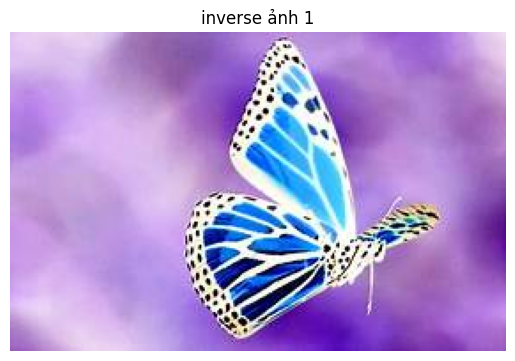

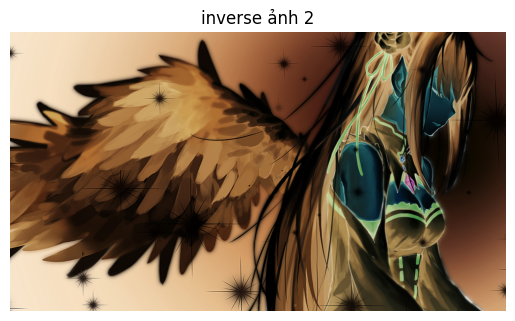

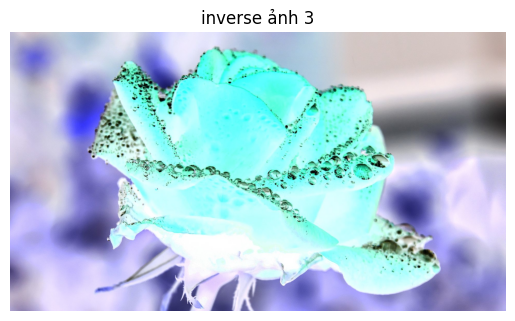

Áp dụng phương pháp: gamma


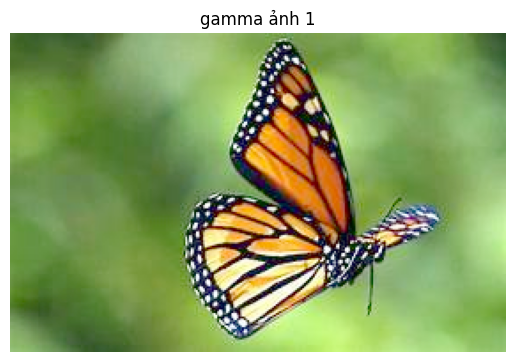

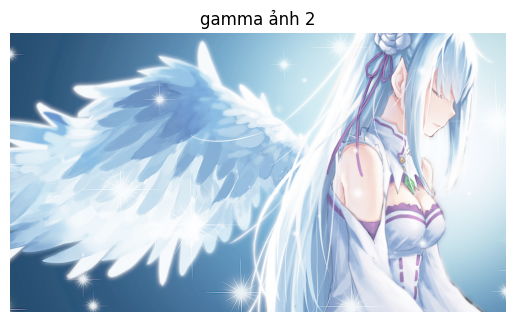

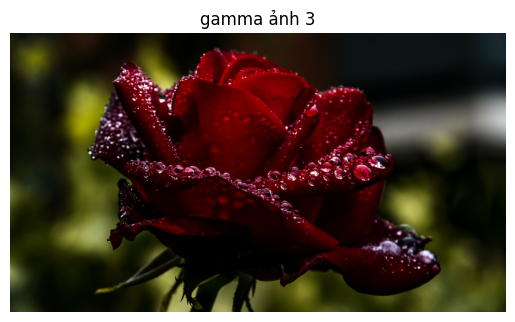

Áp dụng phương pháp: gamma


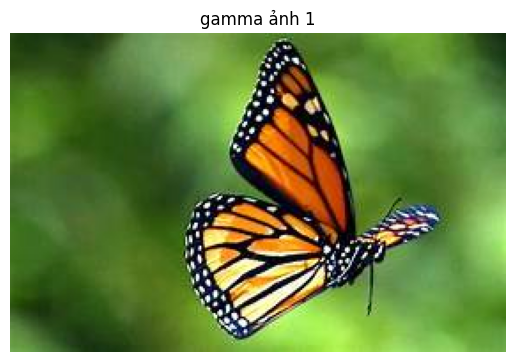

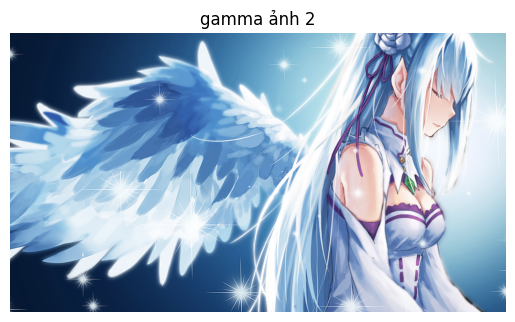

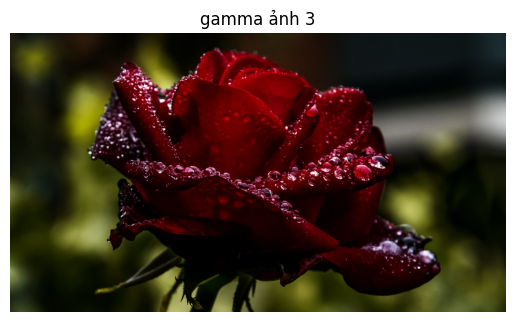

Áp dụng phương pháp: log


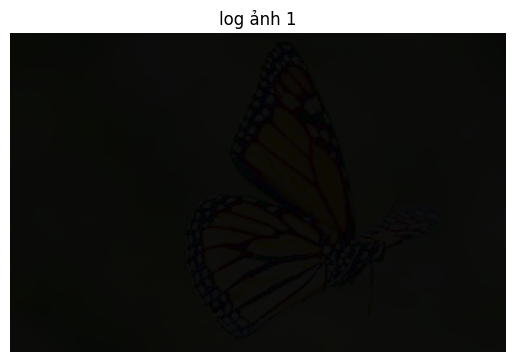

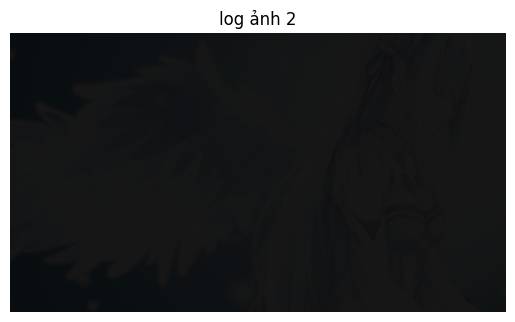

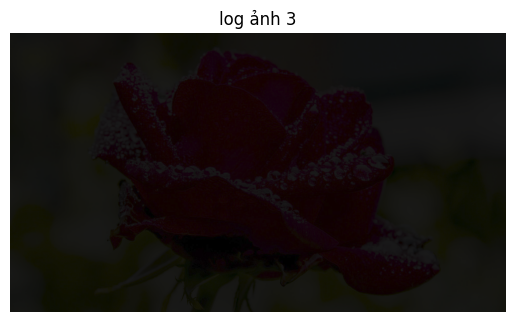

Phím không hợp lệ. Nhập lại.
Phím không hợp lệ. Nhập lại.
Phím không hợp lệ. Nhập lại.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Hàm hiển thị ảnh
def show_image(img, title="Ảnh"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Đọc 3 ảnh
img_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']
images = [cv2.imread(p) for p in img_paths]

# Kiểm tra ảnh có tồn tại không
for i, img in enumerate(images):
    if img is None:
        print(f"Không thể đọc ảnh {img_paths[i]}. Kiểm tra lại đường dẫn.")
        exit()

# Các hàm biến đổi ảnh
def inverse_image(img):
    return 255 - img

def gamma_correction(img):
    gamma = random.uniform(0.5, 2.0)
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img):
    c = random.uniform(1.0, 5.0)
    img_float = img.astype(np.float32)
    result = c * np.log(1 + img_float)
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def contrast_stretching(img):
    min_val = random.randint(0, 50)
    max_val = random.randint(200, 255)
    img_float = img.astype(np.float32)
    stretched = (img_float - min_val) * (255.0 / (max_val - min_val))
    stretched = np.clip(stretched, 0, 255)
    return stretched.astype(np.uint8)

def adaptive_hist_equalization(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    lab_eq = cv2.merge((l_eq, a, b))
    return cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

# Danh sách phương pháp
methods = {
    'i': ('inverse', inverse_image),
    'g': ('gamma', gamma_correction),
    'l': ('log', log_transform),
    'h': ('histeq', histogram_equalization),
    'c': ('contrast', contrast_stretching),
    'a': ('adaptive', adaptive_hist_equalization)
}

# Menu lựa chọn
print("Chọn phím để áp dụng biến đổi:")
print("i - Inverse image")
print("g - Gamma correction")
print("l - Log transform")
print("h - Histogram equalization")
print("c - Contrast stretching")
print("a - Adaptive histogram equalization")
print("q - Thoát")

while True:
    key = input("Nhập phím: ").lower()
    
    if key == 'q':
        print("Kết thúc chương trình.")
        break

    if key in methods:
        method_name, method_func = methods[key]
        print(f"Áp dụng phương pháp: {method_name}")
        
        for idx, img in enumerate(images):
            out = method_func(img)
            filename = f"output_{method_name}_{idx+1}.jpg"
            cv2.imwrite(filename, out)
            show_image(out, f"{method_name} ảnh {idx+1}")
    else:
        print("Phím không hợp lệ. Nhập lại.")


3

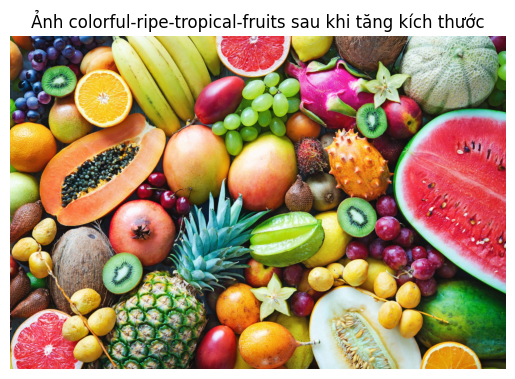

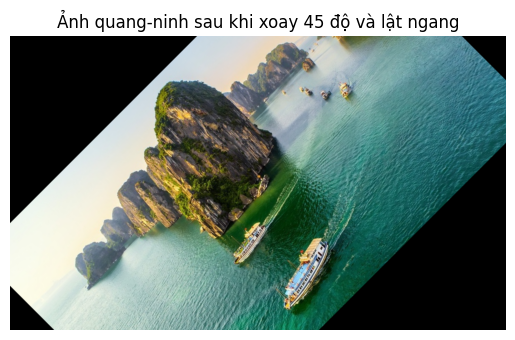

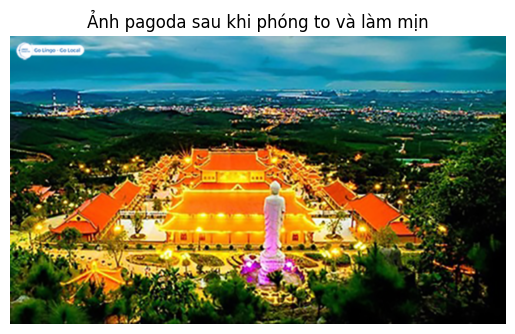

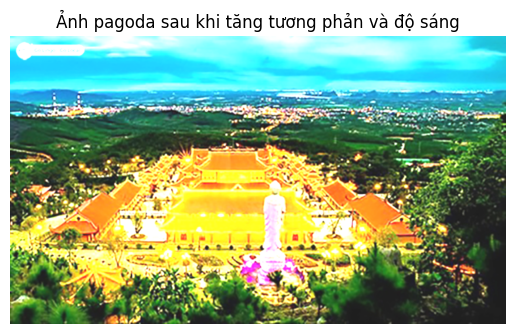

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img1 = cv2.imread('colorful-ripe-tropical-fruits.jpg')
img2 = cv2.imread('quang_ninh.jpg')
img3 = cv2.imread('pagoda.jpg')

# Tăng kích thước ảnh colorful-ripe-tropical-fruits thêm 30 pixel mỗi chiều
new_width = img1.shape[1] + 30
new_height = img1.shape[0] + 30
resized_img1 = cv2.resize(img1, (new_width, new_height))

# Hiển thị ảnh đã resize
plt.imshow(cv2.cvtColor(resized_img1, cv2.COLOR_BGR2RGB))
plt.title("Ảnh colorful-ripe-tropical-fruits sau khi tăng kích thước")
plt.axis('off')
plt.show()

# Xoay ảnh quang-ninh 45 độ và lật ngang
(h, w) = img2.shape[:2]
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated_img2 = cv2.warpAffine(img2, matrix, (w, h))
flipped_img2 = cv2.flip(rotated_img2, 1)

# Hiển thị ảnh đã xoay và lật
plt.imshow(cv2.cvtColor(flipped_img2, cv2.COLOR_BGR2RGB))
plt.title("Ảnh quang-ninh sau khi xoay 45 độ và lật ngang")
plt.axis('off')
plt.show()

# Phóng to ảnh pagoda lên 5 lần và làm mịn bằng Gaussian Blur 7x7
img3_resized = cv2.resize(img3, (0, 0), fx=5, fy=5)
img3_blurred = cv2.GaussianBlur(img3_resized, (7, 7), 0)

# Hiển thị ảnh đã phóng to và làm mịn
plt.imshow(cv2.cvtColor(img3_blurred, cv2.COLOR_BGR2RGB))
plt.title("Ảnh pagoda sau khi phóng to và làm mịn")
plt.axis('off')
plt.show()

# Áp dụng công thức tăng tương phản và độ sáng: Iout = alpha * Iin + beta
alpha = 1.5
beta = 30
adjusted = cv2.convertScaleAbs(img3_blurred, alpha=alpha, beta=beta)

# Hiển thị ảnh sau khi áp dụng công thức biến đổi
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.title("Ảnh pagoda sau khi tăng tương phản và độ sáng")
plt.axis('off')
plt.show()
